In [8]:

# Define a function to perform Kruskal's algorithm
def kruskal(graph):
    # Sort the edges in ascending order by weight
    sorted_edges = sorted(graph, key=lambda x: x[2])
    
    # Create an empty list to store the MST and a dictionary to keep track of each node's parent
    mst = []
    parent = {node: node for node in range(len(graph))}
    
    # Define a helper function to find the parent of a node
    def find_parent(node):
        if parent[node] == node:
            return node
        return find_parent(parent[node])

    
    # Iterate over each edge in the sorted graph
    for edge in sorted_edges:
        # Find the parents of the nodes connected by the current edge
        parent_u = find_parent(edge[0])
        parent_v = find_parent(edge[1])
        
        # If the parents are different, add the edge to the MST and update the parents
        if parent_u != parent_v:
            mst.append(edge)
            for node in parent:
                if parent[node] == parent_u:
                    parent[node] = parent_v
                    
    # Return the MST
    
    return mst


In [29]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal(graph):
    # Sort the edges in ascending order by weight
    sorted_edges = sorted(graph, key=lambda x: x[2])
    
    # Create an empty list to store the MST and a dictionary to keep track of each node's parent
    mst = []
    parent = {node: node for node in range(len(graph))}
    print (parent)
    
    # Define a helper function to find the parent of a node
    def find_parent(node):
        if parent[node] == node:
            return node
        print(node)
        return find_parent(parent[node])
        
    
    # Create a networkx graph object for the original graph
    G = nx.Graph()
    G.add_weighted_edges_from(graph)
    
    # Plot the original graph
    plt.subplot(121)
    pos = nx.kamada_kawai_layout(G,weight=1)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Original Graph')
    
    # Iterate over each edge in the sorted graph
    for edge in sorted_edges:
        # Find the parents of the nodes connected by the current edge
        print(edge)
        parent_u = find_parent(edge[0])
        parent_v = find_parent(edge[1])
        print(parent)
        # If the parents are different, add the edge to the MST and update the parents
        if parent_u != parent_v:
            mst.append(edge)
            for node in parent:
                if parent[node] == parent_u:
                    parent[node] = parent_v
    print(parent,"ytrduyt")
    # Create a networkx graph object for the MST
    MST = nx.Graph()
    MST.add_weighted_edges_from(mst)
    
    # Plot the MST
    plt.subplot(122)
    pos = nx.kamada_kawai_layout(MST,weight=1)
    nx.draw(MST, pos, with_labels=True)
    labels = nx.get_edge_attributes(MST,'weight')
    nx.draw_networkx_edge_labels(MST, pos, edge_labels=labels)
    plt.title('Minimum Spanning Tree')
    
    # Show the plots
    plt.show()
    
    # Return the MST
    return mst


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(2, 4, 1)
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(0, 1, 2)
{0: 0, 1: 1, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(0, 2, 3)
0
2
{0: 1, 1: 1, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(0, 3, 3)
0
{0: 4, 1: 4, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(1, 4, 3)
1
4
{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(1, 2, 4)
1
2
{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(2, 3, 5)
2
{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(3, 5, 7)
{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(4, 5, 8)
4
{0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
(5, 6, 9)
{0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 7, 8: 8, 9: 9} ytrduyt


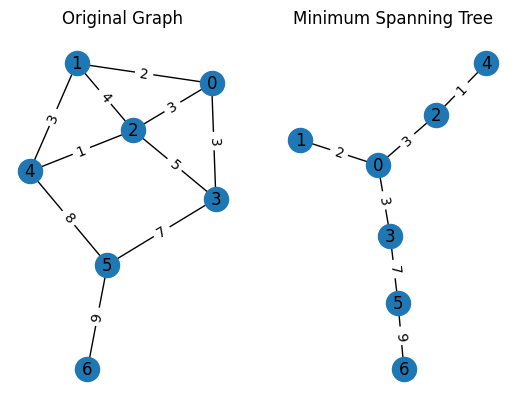

[(2, 4, 1), (0, 1, 2), (0, 2, 3), (0, 3, 3), (3, 5, 7), (5, 6, 9)]


In [30]:
graph = [(0,1,2), (0,2,3), (0,3,3), (1,2,4), (1,4,3), ( 2,3,5), (2,4,1), (4,5,8), (3,5,7), (5,6,9)]


MST = kruskal(graph)
print(MST)

In [37]:
# Python code for Kruskal's algorithm

def kruskal(n, edges):
    # Sort edges by weight
    edges.sort(key=lambda x: x[2])
    
    # Initialize disjoint sets
    parent = list(range(n))
    rank = [0] * n
    
    # Define find and union functions
    def find(i):
        if parent[i] != i:
            parent[i] = find(parent[i])
        return parent[i]
    
    def union(i, j):
        root_i, root_j = find(i), find(j)
        if root_i != root_j:
            if rank[root_i] < rank[root_j]:
                parent[root_i] = root_j
            else:
                parent[root_j] = root_i
                if rank[root_i] == rank[root_j]:
                    rank[root_i] += 1
    
    # Build MST
    mst = []
    for edge in edges:
        u, v, w = edge
        if find(u) != find(v):
            union(u, v)
            mst.append(edge)
    
    return mst

graph = [(0,1,2), (0,2,3), (0,3,3), (1,2,4), (1,4,3), ( 2,3,5), (2,4,1), (4,5,8), (3,5,7), (5,6,9)]


MST = kruskal(7,graph)
print(MST)

[(2, 4, 1), (0, 1, 2), (0, 2, 3), (0, 3, 3), (3, 5, 7), (5, 6, 9)]
